## BTC and ETH price action between BTC halvings and US presidential election

<p style="color:gray;"><i>Built in July, 2024.</i></p>

The 2024 US presidential election could significantly influence the crypto markets, often seen as a safeguard against global uncertainty. This notebook explores the effects of presidential elections on key cryptocurrencies, specifically Bitcoin and Ethereum. Data from 2016 onwards is analyzed.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

For data gathering and preprocessing, look into `./data_gathering.ipynb`

In [30]:
df = pd.read_csv('data/merged.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

These are some dates that this notebook focuses at

In [31]:
election1 = '2016-11-08'
election2 = '2020-11-03'
election3 = '2024-11-05'
halving2 = '2016-07-09'
halving3 = '2020-05-11'
halving4 = '2024-04-19'

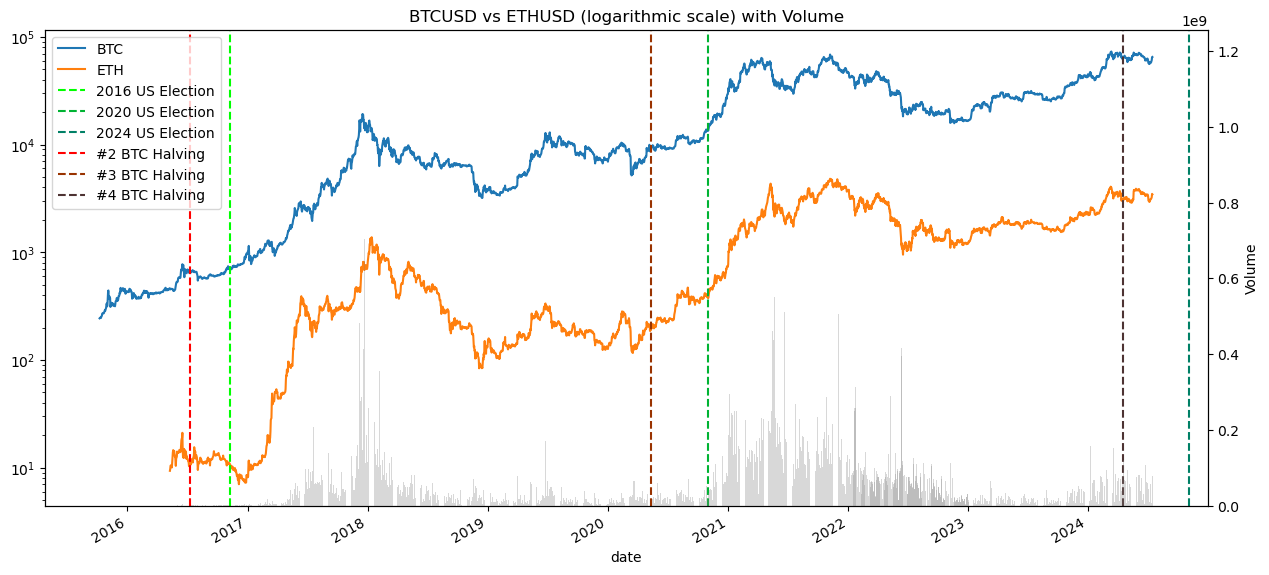

In [32]:
fig, ax1 = plt.subplots(figsize=(15, 7))

df.plot(y=['BTC', 'ETH'], ax=ax1, title='BTCUSD vs ETHUSD (logarithmic scale) with Volume', logy=True)

ax1.axvline(x=election1, color=(0, 1, 0), linestyle='--', label='2016 US Election')
ax1.axvline(x=election2, color=(0, 0.7, 0.2), linestyle='--', label='2020 US Election')
ax1.axvline(x=election3, color=(0, 0.5, 0.4), linestyle='--', label='2024 US Election')
ax1.axvline(x=halving2, color=(1, 0, 0), linestyle='--', label='#2 BTC Halving')
ax1.axvline(x=halving3, color=(0.6, 0.2, 0), linestyle='--', label='#3 BTC Halving')
ax1.axvline(x=halving4, color=(0.3, 0.2, 0.2), linestyle='--', label='#4 BTC Halving')

ax2 = ax1.twinx()

ax2.bar(df.index, df['BTC Volume in USD'] + df['ETH Volume in USD'], color='grey', alpha=0.3)
ax2.set_ylabel('Volume')

ax1.set_xlim(None, '2024-12-31')
ax1.legend()
plt.show()

First, looking into the simple price action between the halvings and the election dates.

In [33]:
print("Price change between second halving and 2016 election")
print(f'BTC: {(df.at[election1, "BTC"][0] / df.at[halving2, "BTC"][0] - 1):.2f}')
print(f'ETH: {(df.at[election1, "ETH"][0] / df.at[halving2, "ETH"][0] - 1):.2f}')

print("\nPrice change between third halving and 2020 election")
print(f'BTC: {(df.at[election2, "BTC"][0] / df.at[halving3, "BTC"][0] - 1):.2f}')
print(f'ETH: {(df.at[election2, "ETH"][0] / df.at[halving3, "ETH"][0] - 1):.2f}')

print("\nPrice change between fourth halving and 2024-07-12")
print(f'BTC: {(df.at['2024-07-12', "BTC"][0] / df.at[halving4, "BTC"][0] - 1):.2f}')
print(f'ETH: {(df.at['2024-07-12', "ETH"][0] / df.at[halving4, "ETH"][0] - 1):.2f}')

Price change between second halving and 2016 election
BTC: 0.12
ETH: -0.05

Price change between third halving and 2020 election
BTC: 0.60
ETH: 1.05

Price change between fourth halving and 2024-07-12
BTC: -0.09
ETH: 0.02


No clear trend in price action can be seen. 

Next, focusing on the volatility of the crypto during above mentioned periods.

In [34]:
# calculating the standard deviation of the price of BTC and ETH over the last 7 days on a rolling base and adjusting it for the price
df['BTC std adj. for price'] = df['BTC'].rolling(window=7, min_periods=1).std() / df['BTC'].rolling(window=7, min_periods=1).mean()
df['ETH std adj. for price'] = df['ETH'].rolling(window=7, min_periods=1).std() / df['ETH'].rolling(window=7, min_periods=1).mean()

In [35]:
print("Average deviation in price between second halving and 2016 election as percentage of weekly rolling average")
print(f'BTC: {(df.loc[halving2:election1]['BTC std adj. for price'].mean()):.4f}')
print(f'ETH: {(df.loc[halving2:election1]['ETH std adj. for price'].mean()):.4f}')

print("\nAverage deviation in price between third halving and 2020 election as percentage of weekly rolling average")
print(f'BTC: {(df.loc[halving3:election2]['BTC std adj. for price'].mean()):.4f}')
print(f'ETH: {(df.loc[halving3:election2]['ETH std adj. for price'].mean()):.4f}')

print("\nAverage deviation in price between fourth halving and 2024-07-12 as percentage of weekly rolling average")
print(f'BTC: {(df.loc[halving4:'2024-07-12']['BTC std adj. for price'].mean()):.4f}')
print(f'ETH: {(df.loc[halving4:'2024-07-12']['ETH std adj. for price'].mean()):.4f}')

Average deviation in price between second halving and 2016 election as percentage of weekly rolling average
BTC: 0.0150
ETH: 0.0383

Average deviation in price between third halving and 2020 election as percentage of weekly rolling average
BTC: 0.0234
ETH: 0.0377

Average deviation in price between fourth halving and 2024-07-12 as percentage of weekly rolling average
BTC: 0.0226
ETH: 0.0272


In [36]:
print("Average deviation in price, as percentage of weekly rolling average for entire dataset")
print(f'BTC: {df['BTC std adj. for price'].mean()}')
print(f'ETH: {df['ETH std adj. for price'].mean()}')

Average deviation in price, as percentage of weekly rolling average for entire dataset
BTC: 0.03275893579696102
ETH: 0.04431330519521463


Surprisingly, the crypto markets seem to be less volatile during the run-up to elections. 

Finally, calculating the correlation between BTC and ETH and looking how it is influenced by the halving and upcoming elections.

In [37]:
print(f'Correlation over all dataset: {df['BTC'].corr(df['ETH'])}')

Correlation over all dataset: 0.9432549072981177


In [38]:
print("Correlation between BTC and ETH from second halving to 2016 election")
print(f'{(df.loc[halving2:election1]['BTC'].corr(df.loc[halving2:election1]['ETH'])):.4f}')

print("\nCorrelation between BTC and ETH from third halving to 2020 election")
print(f'{(df.loc[halving3:election2]['BTC'].corr(df.loc[halving3:election2]['ETH'])):.4f}')

print("\nCorrelation between BTC and ETH from fourth halving to 2024-07-12")
print(f'{(df.loc[halving4:'2024-07-12']['BTC'].corr(df.loc[halving4:'2024-07-12']['ETH'])):.4f}')

Correlation between BTC and ETH from second halving to 2016 election
-0.0706

Correlation between BTC and ETH from third halving to 2020 election
0.8764

Correlation between BTC and ETH from fourth halving to 2024-07-12
0.7578


2016 looks like an exception having negative correlation which is surprising, however the other two periods show that two cryptocurrencies in   question experienced lower correlation during 2020 and 2024 (so far) respectively.

Overall, no clear conclusions can be made about effect of elections on crypto markets. 

It seems like the crypto market experiences significant uptrend after the election, as BTC and ETH both boomed in 2017 and in 2021 (the years after election).